Why Do We Need Data Augmentation?
For starters, it will help us obtain more data for training. Maybe we have a small training set, or maybe we just want to make our training set larger. We can do that by augmenting our existing data and then adding that data to the training set.

Another reason to use data augmentation is to reduce overfitting.

blog link = https://deeplizard.com/learn/video/14syUbL16k4

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [77]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [78]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., brightness_range=[0.2,1.2] , horizontal_flip=True)

In [79]:
chosen_image = random.choice(os.listdir('data/train/dog'))

In [80]:
image_path = 'data/train/dog/' + chosen_image

In [81]:
# Importing Image class from PIL module
from PIL import Image

# Opens a image in RGB mode
im = Image.open(image_path)
basewidth = 500
wpercent = (basewidth/float(im.size[0]))
hsize = int((float(im.size[1])*float(wpercent)))
im = im.resize((basewidth,hsize), Image.ANTIALIAS)
im.show()
im.save("data/train/dog/reshaped.jpg")

In [82]:
image_path = "data/train/dog/reshaped.jpg"
image = np.expand_dims(im,0)

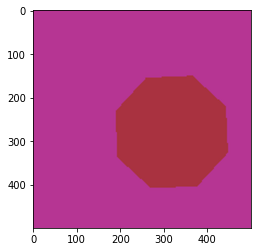

In [83]:
plt.imshow(image[0])

In [84]:
aug_iter = gen.flow(image)

In [85]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(5)]

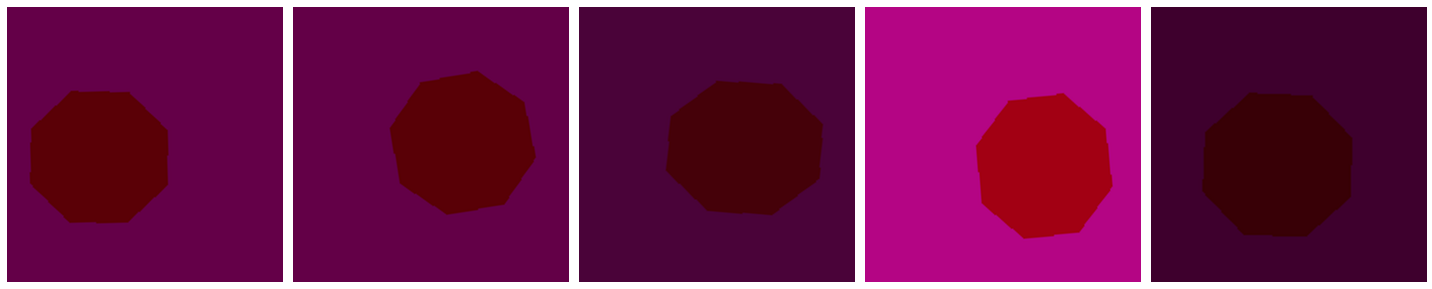

In [86]:
plotImages(aug_images)

In [87]:
aug_iter = gen.flow(image, save_to_dir='data/train/dog', save_prefix='aug-image-', save_format='jpeg')

In [88]:

count = 1
for i in aug_iter:
    print(count)
    if(count >= 5):
        break
    count = count + 1

1
2
3
4
5
